In [1]:

import numpy as np 
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [5]:
df = pd.read_csv('C:/Users/LENOVO/OneDrive/Desktop/data analytics intern/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df["mean score"] = ((df["math score"] + df["reading score"] + df["writing score"]) / 3).round()
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


In [10]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head()
# fit_transform is used to convert categorical data machine code 0 and 1

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0


In [16]:
df['test preparation course'].value_counts()

test preparation course
1    642
0    358
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1a723f9c790>,
 [Text(-0.4746018502673304, 0.9923472596439347, 'Dont finished'),
  Text(0.47460146383300333, -0.9923474444606439, 'finished')])

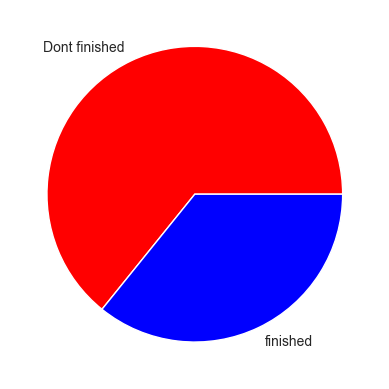

In [35]:
labels = ['Dont finished', 'finished']
colors = ['red', 'blue']
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors)

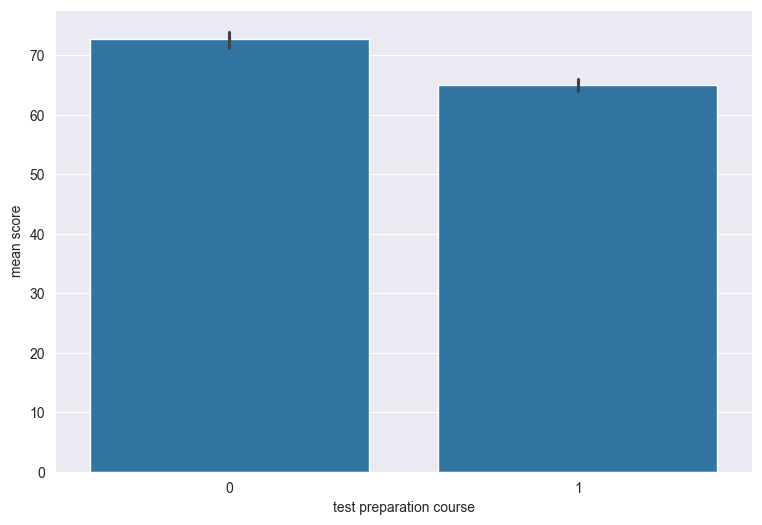

In [36]:
plt.figure(figsize = (9,6))
sns.barplot(x = 'test preparation course', y = 'mean score', data = df)
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_34244\2699386646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')


<Axes: xlabel='lunch', ylabel='mean score'>

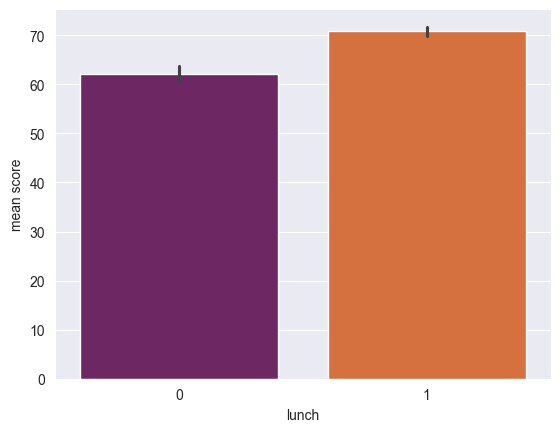

In [37]:
sns.barplot(x = df['lunch'], y = df['mean score'], palette = 'inferno')

<Axes: xlabel='parental level of education', ylabel='mean score'>

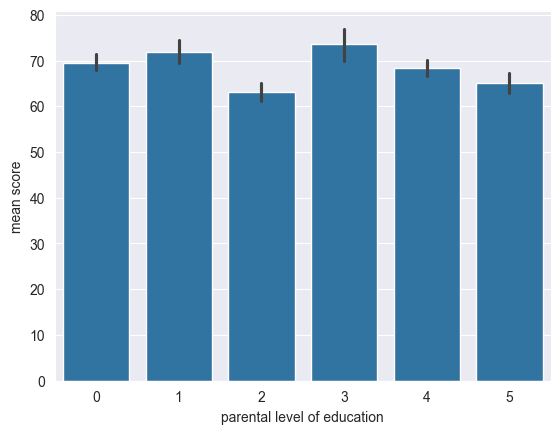

In [20]:
sns.barplot(x = 'parental level of education', y = 'mean score', data = df)

<Figure size 1200x600 with 0 Axes>

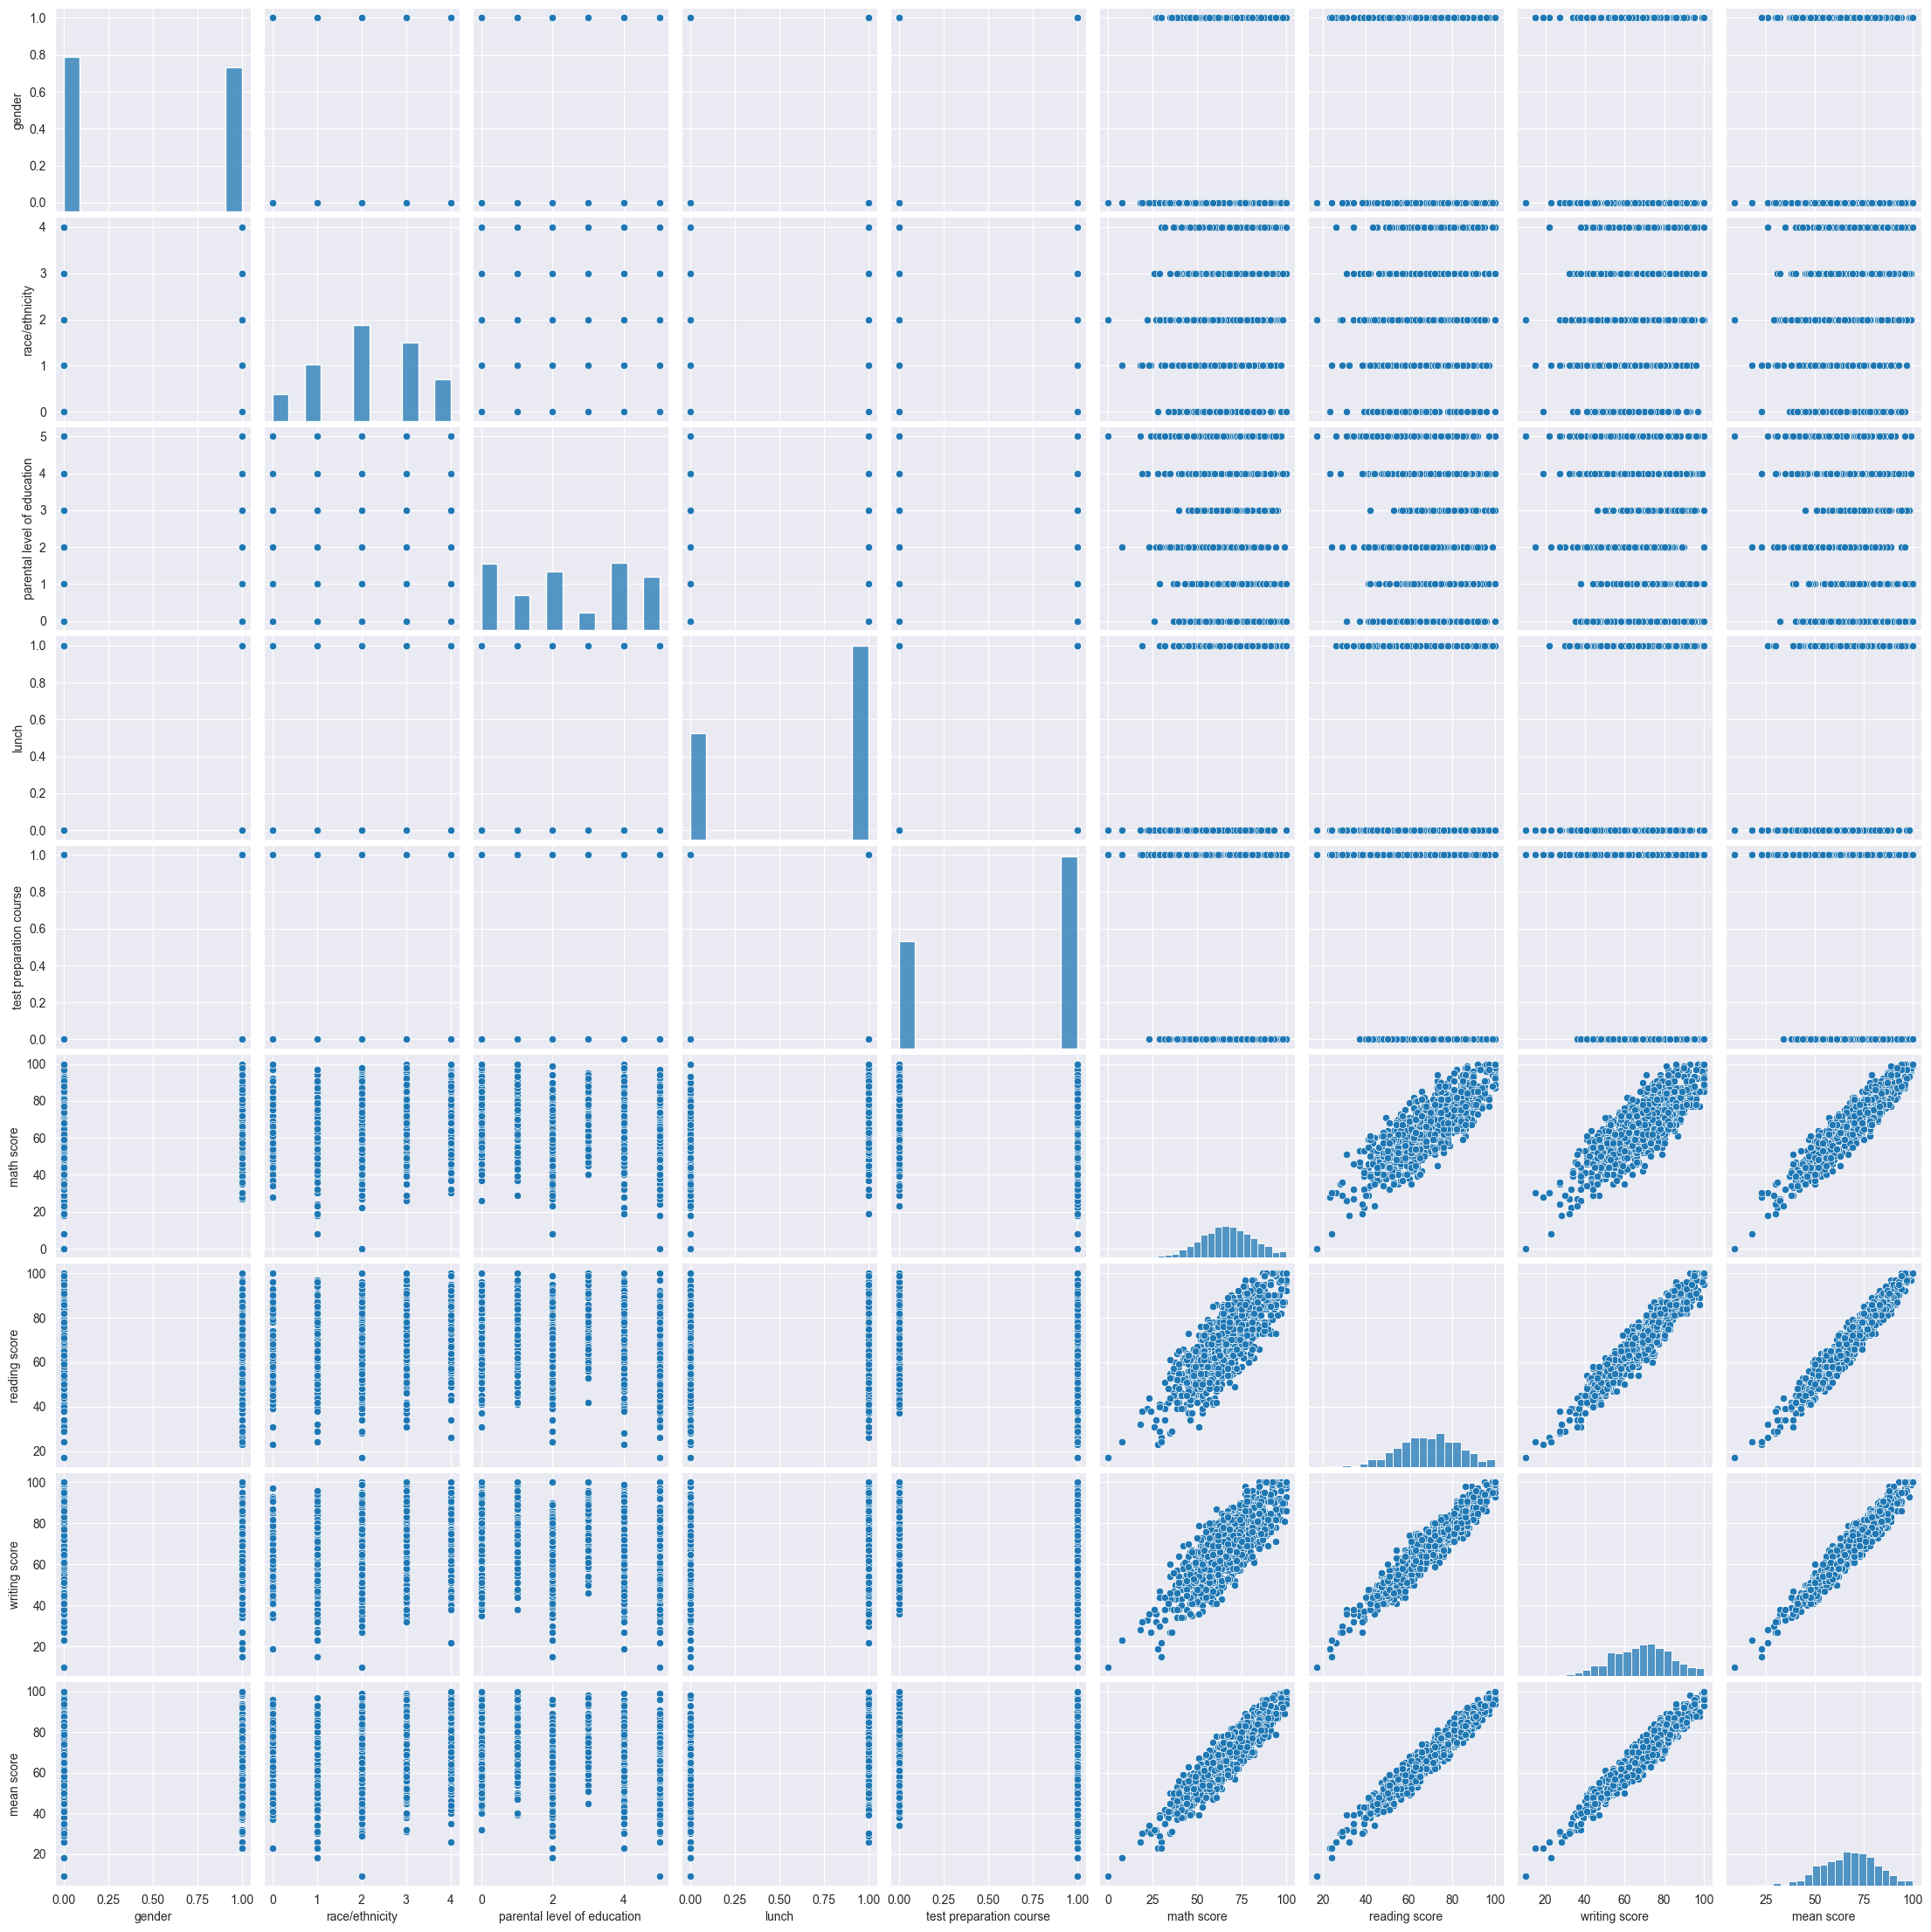

In [21]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

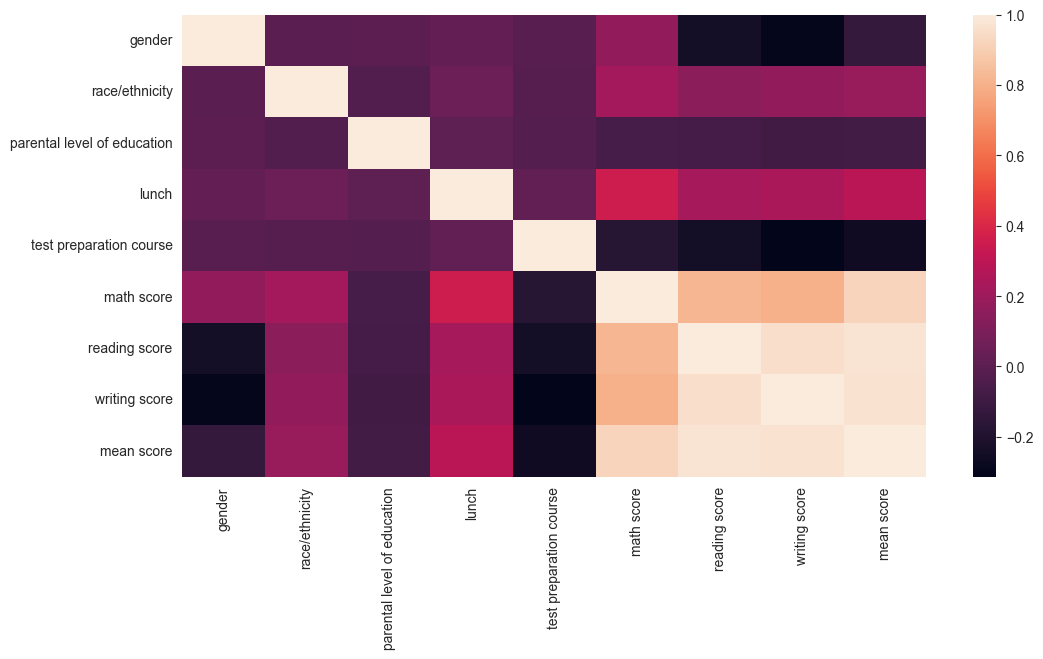

In [22]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [23]:
df = df.drop(['math score', 'writing score', 'reading score'],axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [24]:
from sklearn.model_selection import train_test_split
y = df['mean score']
x = df.drop(['mean score'], axis  = 1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
model = LogisticRegression(solver='liblinear', random_state=0)

In [28]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [29]:
LogisticRegression(random_state=0, solver='liblinear')

LogisticRegression(random_state=0, solver='liblinear')

In [30]:
predictions = model.predict(x_test)

In [31]:
difference = abs(predictions - y_test)

In [32]:
difference.mean()

np.float64(11.03)